In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from datetime import datetime

# import bert
# from bert import run_classifier
# from bert import optimization
# from bert import tokenization

/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: 

In [7]:
import pickle
import pandas as pd
import numpy as np

DATA_COLUMN = 'questions'
LABEL_COLUMN = 'numeric label'

df_all_data = pd.read_csv('./amelia_data/381classes/vanguard_mturk_utterance_380classes.csv')
df_all_data['numeric label'] = df_all_data['numeric label'].astype(np.int64)
df_all_data = df_all_data.drop(columns=['category'])

In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

df_all_data = shuffle(df_all_data)
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(df_all_data)

df_train_array = {}
df_test_array = {}


loop=0

for train_index, test_index in kf.split(df_all_data):
    df_train = df_all_data.iloc[train_index]
    df_test = df_all_data.iloc[test_index]
    
    df_train_array[loop] = df_train
    df_test_array[loop] = df_test
    
    loop= loop+1


NameError: name 'df_all_data' is not defined

In [9]:
df_train_array[0]

,questions,numeric label
13701,Is there a difference between a direct and ind...,232
18983,Is it required that all authorized signers sig...,322
12400,Please explain what track your transfer displays,203
2376,How do I withdraw in shares from the automatic...,36
13796,How should I calculate the 60 day window for i...,234
...,...,...
1103,What distribution options are available for an...,15
12016,Is it necessary for the client to liquidate th...,196
7509,can i get a temporary password with the enhanc...,118
18815,Does everything have to be completed by a clie...,320


In [2]:
df_train_array[0].to_csv('./amelia_data/381classes/split0/train.tsv',sep='\t', header=False, index=False)
df_test_array[0].to_csv('./amelia_data/381classes/split0/test.tsv',sep='\t', header=False, index=False)
df_train_array[1].to_csv('./amelia_data/381classes/split1/train.tsv',sep='\t', header=False, index=False)
df_test_array[1].to_csv('./amelia_data/381classes/split1/test.tsv',sep='\t', header=False, index=False)
df_train_array[2].to_csv('./amelia_data/381classes/split2/train.tsv',sep='\t', header=False, index=False)
df_test_array[2].to_csv('./amelia_data/381classes/split2/test.tsv',sep='\t', header=False, index=False)
df_train_array[3].to_csv('./amelia_data/381classes/split3/train.tsv',sep='\t', header=False, index=False)
df_test_array[3].to_csv('./amelia_data/381classes/split3/test.tsv',sep='\t', header=False, index=False)
df_train_array[4].to_csv('./amelia_data/381classes/split4/train.tsv',sep='\t', header=False, index=False)
df_test_array[4].to_csv('./amelia_data/381classes/split4/test.tsv',sep='\t', header=False, index=False)


NameError: name 'df_train_array' is not defined

In [ ]:
sim_array

In [25]:
# Google BERT small + Vanguard Sharepoint Encodings  + bach 16
# 5 epoch 0.9224
# 6 epoch 0.9270
# 7 epoch 0.9301
# 8 epoch 0.9318
# 9 epoch 0.9316
# 10 epoch 0.9318
# 11 epoch 0.9327
# 12 epoch 0.9345
# 13 epoch 0.9351
# 14 epoch 0.9360
# 15 epoch 0.9369
# 16 epoch 0.9358
# 17 epoch 0.9382
# 18 epoch 0.9375
# 19 epoch 0.9373
# 20 epoch 0.9386
# 21 epoch 0.9389
# 22 epoch 0.9397
# 23 epoch 0.9393
# 24 epoch 0.9402
# 25 epoch 0.9406
# 50 epoch

# Google BERT small + Vanguard Sharepoint Encodings  + bach 32
# 5 epoch 0.9224


#Google BERT small +  Google Pretrained Encodings   + batch 16
# 5 epoch 0.7519
# 6 epoch 0.7669
# 7 epoch 0.7805
# 8 epoch 0.7880
# 9 epoch 0.7964
# 10 epoch 0.8026
# 11 epoch 0.8075
# 12 epoch 0.8139
# 13 epoch 0.8163
# 14 epoch 0.8220
# 15 epoch 0.8269
# 16 epoch 0.8293
# 17 epoch 0.8326
# 18 epoch 0.8352
# 19 epoch 0.8392
# 20   0.8434
# 21   0.84494925
# 22  0.84715486
# 23  0.8498015
# 24  0.8526687
# 25  0.8542
# 30  0.8903838
# 35   0.9086899
# 40  0.91993827
# 45  0.923026
# 50  0.9280988

# Google batch 32
# 5 epoch eval_accuracy = 0.7485664
# 10 epoch  0.8758271
# 11 0.8793559
# 12 0.88200265
# 13 0.88354653
# 14 0.8859727
# 15  0.8870754
# 16 0.889281
# 17 0.89104545
# 18 0.89258933
# 19  0.8936921
# 20 0.8947949
# 25 0.9139832
# 30 0.92589325
# 35  0.9342744
# 40  0.93670046
# 45  0.94199383
# 50  0.94199383

# 5 epoch eval_accuracy = 0.9653157!
    
#0.9552
!python bert/run_classifier_inmem.py --task_name=COLA --do_train=true --do_predict=true --do_eval=true --do_export=true \
  --train_batch_size=16 \
  --learning_rate=2e-5 \
  --num_train_epochs=30 \
  --data_dir=./amelia_data/381_5_classes/split0 \
  --vocab_file=./bert_model_serve_sharepoint/vocab.txt \
  --bert_config_file=./bert_model_serve_sharepoint/bert_config.json \
  --init_checkpoint=./bert_model_serve_sharepoint/bert_model.ckpt \
  --max_seq_length=128 \
  --output_dir=./output_amelia \
  --export_dir=./export_amelia




/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: 

In [22]:
import numpy as np

A = np.dstack((sim_array[0],sim_array[1], sim_array[2],sim_array[3], sim_array[4],sim_array[5], sim_array[6],sim_array[7], sim_array[8],sim_array[9]))

In [8]:
var = np.std(A, axis=2)
m = np.mean(A, axis=2)

NameError: name 'np' is not defined

In [32]:
var

array([[0.00270936, 0.00327541, 0.0165942 , ..., 0.00324222, 0.00267444,
        0.0030777 ],
       [0.00139808, 0.00185502, 0.00256043, ..., 0.00142741, 0.00098906,
        0.00112562],
       [0.00114603, 0.00222116, 0.00758041, ..., 0.00154895, 0.0018373 ,
        0.00175714],
       ...,
       [0.00160926, 0.00202118, 0.00708322, ..., 0.00243891, 0.00240803,
        0.00320661],
       [0.00300952, 0.00136145, 0.00888757, ..., 0.00292736, 0.00169302,
        0.00249303],
       [0.00898187, 0.00506685, 0.02943713, ..., 0.00398013, 0.00330773,
        0.00423106]])

In [36]:
A

array([[[0.00247171, 0.00485172, 0.00364856, ..., 0.01063098,
         0.00096705, 0.0049155 ],
        [0.00506705, 0.00779358, 0.0031722 , ..., 0.01500912,
         0.00369489, 0.00760584],
        [0.01396199, 0.00881199, 0.06959695, ..., 0.0150011 ,
         0.014079  , 0.01879439],
        ...,
        [0.00375352, 0.00608169, 0.00885238, ..., 0.01198922,
         0.00703996, 0.00615357],
        [0.00429569, 0.00501502, 0.00888071, ..., 0.00373014,
         0.00742974, 0.00496761],
        [0.00632055, 0.00830138, 0.01358898, ..., 0.0095097 ,
         0.0106722 , 0.00674238]],

       [[0.00438515, 0.00281839, 0.00253715, ..., 0.00642422,
         0.00218093, 0.00362438],
        [0.00517872, 0.00614728, 0.00309976, ..., 0.00774176,
         0.00310475, 0.00615087],
        [0.0102998 , 0.00416382, 0.00591712, ..., 0.00477564,
         0.00958998, 0.00828314],
        ...,
        [0.00660249, 0.00343798, 0.00221928, ..., 0.00461258,
         0.0040895 , 0.00360568],
        [0.0

In [88]:
def vis(probs):
    plt.rcParams['figure.figsize'] = [40,50]
    
#     Tot = 107


#     # Compute Rows required

#     Rows = Tot // Cols 
#     Rows += Tot % Cols

#     # Create a Position index

#     Position = range(1,Tot + 1)

#     fig = plt.figure(1)
    
#     for k in range(Tot):

#       # add every single subplot to the figure with a for loop
#       ax = fig.add_subplot(Rows,Cols,Position[k])
#       ax.plot(x,y)      # Or whatever you want in the subplot

    
    Cols = 8
    f, axarray = plt.subplots(14,8, sharey=False)

    if_norm_hist = False
    if_kde = False
    
    for loop in range(107):
        
        row = loop //Cols
        col = loop %Cols
        v = probs[0,loop,:]
        sns.distplot(v, norm_hist=if_norm_hist, kde=if_kde,  ax=axarray[row,col])
        axarray[row,col].set_title("Posterior class " + str(loop))
        axarray[row,col].set_xlim([0, 0.2])
        axarray[row,col].set_ylim([0, 10])
        
    
#     v = probs[0,0,:]
#     sns.distplot(v, norm_hist=if_norm_hist, kde=if_kde,  ax=ax0)
#     ax0.set_title("Posterior " + str(class_captions[0]))
#     ax0.set_xlim([0, 0.1])
#     ax0.set_ylim([0, 10])

#     v = probs[0,1,:]
#     sns.distplot(v, norm_hist=if_norm_hist, kde=if_kde,  ax=ax1)
#     ax1.set_title("Posterior " + str(class_captions[1]))
#     ax1.set_xlim([0, 0.1])
#     ax1.set_ylim([0, 10])
    
#     v = probs[0,2,:]
#     sns.distplot(v, norm_hist=if_norm_hist, kde=if_kde,  ax=ax2)
#     ax2.set_title("Posterior " + str(class_captions[2]))
#     ax2.set_xlim([0, 0.1])
#     ax2.set_ylim([0, 10])
    
#     v = probs[0,3,:]
#     sns.distplot(v, norm_hist=if_norm_hist, kde=if_kde,  ax=ax3)
#     ax3.set_title("Posterior " + str(class_captions[3]))
#     ax3.set_xlim([0, 0.1])
#     ax3.set_ylim([0, 10])
    
#     v = probs[0,4,:]
#     sns.distplot(v, norm_hist=if_norm_hist, kde=if_kde,  ax=ax4)
#     ax4.set_title("Posterior " + str(class_captions[4]))
#     ax4.set_xlim([0, 0.1])
#     ax4.set_ylim([0, 10])
    
#     v = probs[0,5,:]
#     sns.distplot(v, norm_hist=if_norm_hist, kde=if_kde,  ax=ax5)
#     ax5.set_title("Posterior " + str(class_captions[5]))
#     ax5.set_xlim([0, 0.1])
#     ax5.set_ylim([0, 10])
    
#     v = probs[0,6,:]
#     sns.distplot(v, norm_hist=if_norm_hist, kde=if_kde,  ax=ax6)
#     ax6.set_title("Posterior " + str(class_captions[6]))
#     ax6.set_xlim([0, 0.1])
#     ax6.set_ylim([0, 10])
    
#     v = probs[0,7,:]
#     sns.distplot(v, norm_hist=if_norm_hist, kde=if_kde,  ax=ax7)
#     ax7.set_title("Posterior " + str(class_captions[7]))
#     ax7.set_xlim([0, 0.1])
#     ax7.set_ylim([0, 10])
    
#     v = probs[0,8,:]
#     sns.distplot(v, norm_hist=if_norm_hist, kde=if_kde,  ax=ax8)
#     ax8.set_title("Posterior " + str(class_captions[8]))
#     ax8.set_xlim([0, 0.1])
#     ax8.set_ylim([0, 10])
    
#     v = probs[0,9,:]
#     sns.distplot(v, norm_hist=if_norm_hist, kde=if_kde,  ax=ax9)
#     ax9.set_title("Posterior " + str(class_captions[9]))    
#     ax9.set_xlim([0, 0.1])
#     ax9.set_ylim([0, 10])
    
    # v = probs[:,1,9]
    # sns.distplot(v, norm_hist=True, kde=True,  ax=ax9)
    # ax9.set_title("posterior samples of class " + str(class_captions[9]))
    f.subplots_adjust(hspace=0.5, wspace = 0.3)
    plt.show()

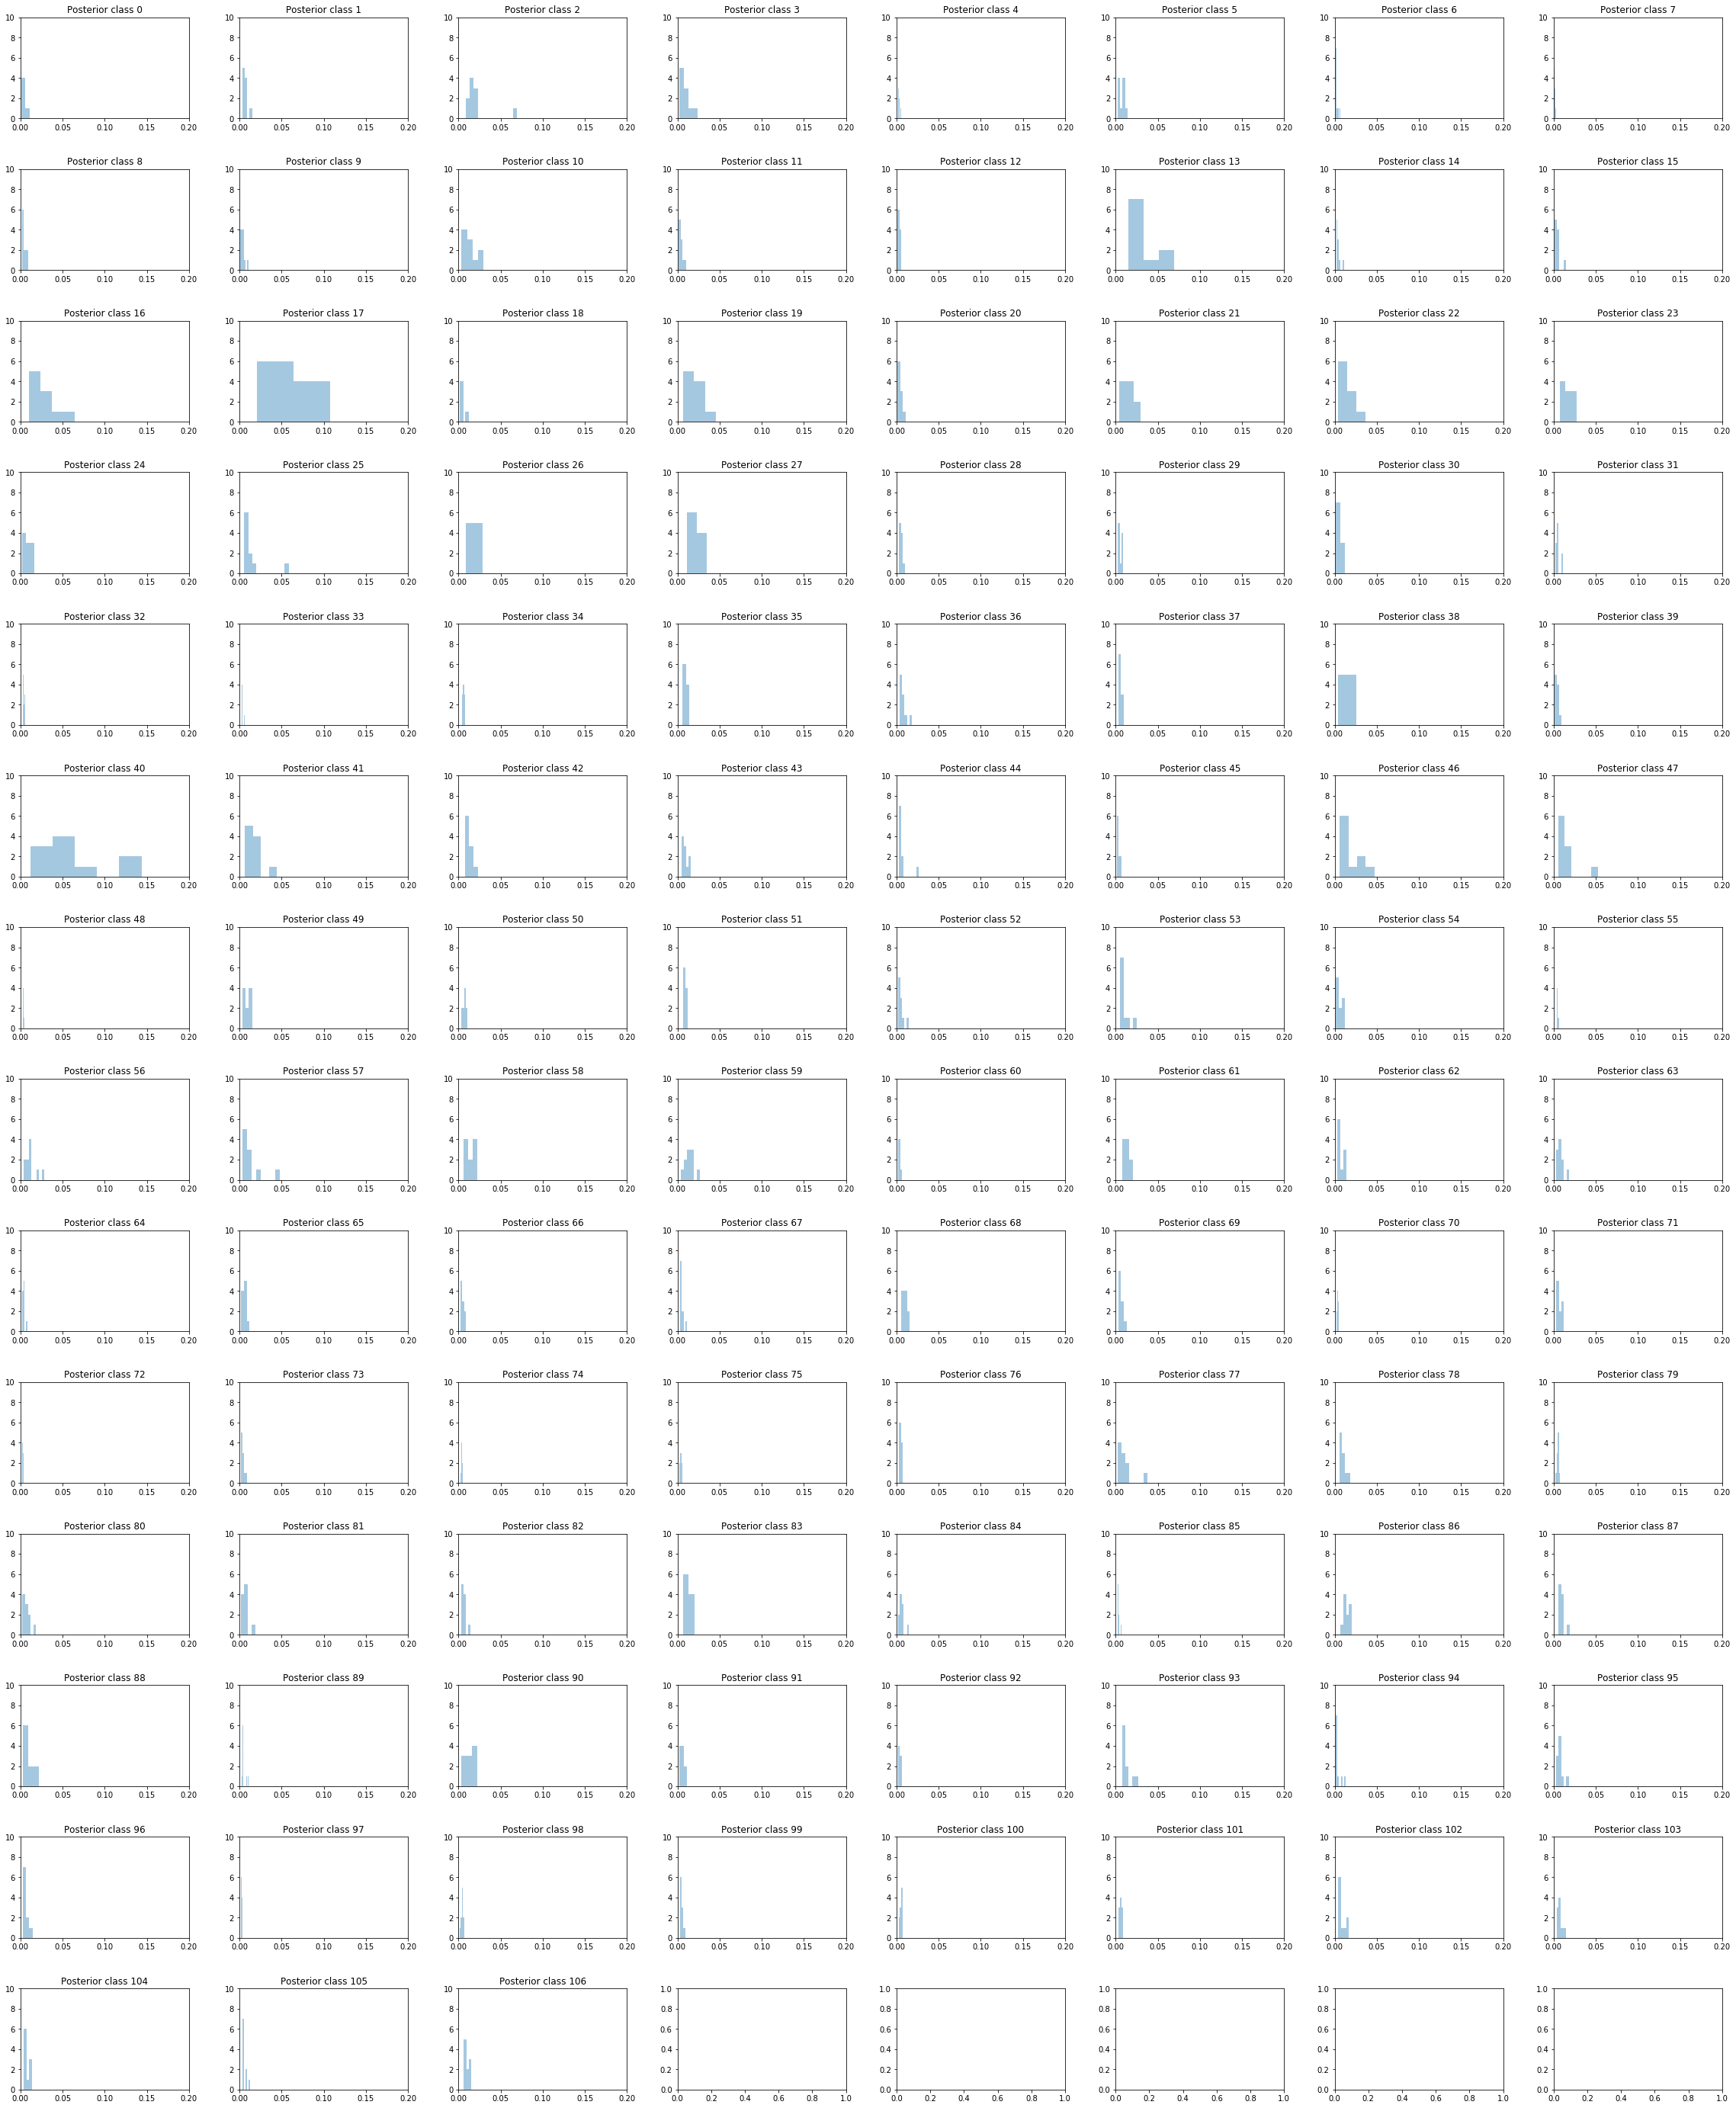

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

vis(A)

In [62]:
axarray[0,0]

In [19]:
import requests
 
response = requests.post("https://domino.opsp.c1.vanguard.com/v1/UQV9/amelia_chatbot/endpoint",
    
#response = requests.post("https://domino.opsp.c1.vanguard.com/v1/UTUZ/ava_benchmark_12A_9H/endpoint",
                         
#response = requests.post("https://domino.opsp.c1.vanguard.com/v1/UTUZ/ava_benchmark_9H_3A/endpoint",
                         
#response = requests.post("https://domino.opsp.c1.vanguard.com/v1/UTUZ/ava_benchmark_6A_12H/endpoint",
                         
#response = requests.post("https://domino.opsp.c1.vanguard.com/v1/UTUZ/ava_benchmark_3A_12H/endpoint",
                         
#response = requests.post("https://domino.opsp.c1.vanguard.com/v1/UTUZ/ava_benchmark_6H_6A/endpoint",                         
                         
    headers = {
        "X-Domino-Api-Key": "RWr5Z2drfVSEXR8BpyTVuF3wJneHqDHf8NB2NOcwrB0cX5qABlkw8UqWc9vO0dmw",
        "Content-Type": "application/json"
    },
    json = {
        "parameters": ["how are you"]
    },
    verify=False
)
 
print(response.status_code)
print(response.headers)
print(response.json())


200
{'Date': 'Mon, 03 Feb 2020 17:08:14 GMT', 'Content-Type': 'application/json; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Domino-Deserialization-Time': '0', 'Domino-User-Code-Time': '152', 'Domino-Serialization-Time': '1', 'Access-Control-Allow-Origin': '*', 'Content-Encoding': 'gzip'}
{'requestId': 'QR64X7XE1BW72QPW', 'status': 'Succeeded', 'elapsedTimeInMs': 0, 'warnings': ['elapsedTimeInMs is deprecated. Please use the values under timing instead.', 'status is deprecated. Please use HTTP status codes to determine the status of a request.'], 'release': {'version': 3, 'commitId': '0e64a55f0e10d949c63b2a02696af9d10fb16231', 'file': 'bert/serving_model.py', 'function': 'endpoint'}, 'result': {'predictions': [0.0007401471957564354, 0.010789630003273487, 0.0008922576671466231, 0.0017341795610263944, 0.0014045732095837593, 0.004400786943733692, 0.0019596260972321033, 0.0012200316414237022, 0.0003841376455966383, 0.002919527469202876, 0.000775641354266554

/usr/local/anaconda/lib/python3.6/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
